# Exploration of L3 CALIOP Data
------------------------------------------------

Sylvie Dagoret-Campagne

Thursday 21 April 2016


In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline

## 1) Hdf5 with h5py
-------------------------

### 1.1 Setting the path to the data
--------------------------------

In [2]:
path='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2013/hdf5'

In [3]:
print(path)

/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2013/hdf5


### 1.2 Getting the list of the files
------------------------------

In [4]:
h5_files = [f for f in os.listdir(path) if f.endswith('.h5')]  
#print(h5_files)
full_h5file=h5_files
ix=0
for file in h5_files:
    fname = os.path.join(path, file)
    full_h5file[ix]=fname
    ix=ix+1    
#print full_h5file[0]

### 1.3 Select a given file

In [5]:
fileindex=23 # selecting the file to open

In [6]:
h5f = h5py.File(full_h5file[fileindex], "r")  # file on which one works

In [7]:
print h5f

<HDF5 file "CAL_LID_L3_APro_AllSky-Standard-V3-00.2013-12N.h5" (mode r)>


In [8]:
sel_filename=os.path.basename(h5_files[fileindex])
sel_filename

'CAL_LID_L3_APro_AllSky-Standard-V3-00.2013-12N.h5'

In [9]:
sel_filename_array=sel_filename.split('.')
print sel_filename_array[0], sel_filename_array[1]

CAL_LID_L3_APro_AllSky-Standard-V3-00 2013-12N


In [10]:
figfilename=sel_filename_array[0]+'_'+ sel_filename_array[1]+".pdf"
print figfilename

CAL_LID_L3_APro_AllSky-Standard-V3-00_2013-12N.pdf


In [11]:
pp = PdfPages(figfilename)

### 1.4 Data analysis
----------------------

#### 1.4.1 list of quantities to analyse

In [12]:
h5f.keys() # show the list of data tables

[u'AOD_63_Percent_Below',
 u'AOD_90_Percent_Below',
 u'AOD_Mean',
 u'AOD_Mean_Dust',
 u'AOD_Mean_Polluted_Dust',
 u'AOD_Mean_Smoke',
 u'Aerosol_Type',
 u'Altitude_Midpoint',
 u'Days_Of_Month_Observed',
 u'Extinction_532_Mean',
 u'Extinction_532_Mean_Dust',
 u'Extinction_532_Mean_Polluted_Dust',
 u'Extinction_532_Mean_Smoke',
 u'Extinction_532_Percentiles',
 u'Extinction_532_Standard_Deviation',
 u'Extinction_532_Standard_Deviation_Dust',
 u'Extinction_532_Standard_Deviation_Polluted_Dust',
 u'Extinction_532_Standard_Deviation_Smoke',
 u'Highest_Aerosol_Layer_Detected',
 u'Highest_Aerosol_Layer_Detected_Dust',
 u'Highest_Aerosol_Layer_Detected_Polluted_Dust',
 u'Highest_Aerosol_Layer_Detected_Smoke',
 u'Initial_Aerosol_Lidar_Ratio_532',
 u'Initial_Aerosol_Lidar_Ratio_Uncertainty_532',
 u'Land_Samples',
 u'Latitude_Midpoint',
 u'Layer_Separation_Maximum',
 u'Layer_Separation_Maximum_Dust',
 u'Layer_Separation_Maximum_Polluted_Dust',
 u'Layer_Separation_Maximum_Smoke',
 u'Layer_Separation

#### 1.4.2 Analysis of Aerosol Optical Depth
--------------------------------------

In [13]:
aod_mean=h5f['AOD_Mean']  # the data table we want to explore is the Aerosol Optical Depth
                          # 85 rows in latitude, 70 columns in longitude

In [14]:
bin_longitude=360./70.    # bins of longitude 5 deg 
print("bin_longitude=",bin_longitude)

('bin_longitude=', 5.142857142857143)


In [15]:
bin_latitude=180./85.     # bins of latitude 2 deg
print("bin_latitude=",bin_latitude)

('bin_latitude=', 2.1176470588235294)


In [16]:
aod_shape=aod_mean.shape

In [17]:
arr=np.zeros(aod_shape)    # create a numpy zero filled array

In [18]:
arr=np.array(aod_mean)     # the array contains data form HDF5 table

In [19]:
flags=np.logical_and(arr>0,arr<1)   # flags where the data are correct

In [20]:
aod_clean=np.where(np.logical_and(arr>0,arr<1),arr  , 0 )  # clean the aod from creazy data

In [21]:
longitude=h5f['Longitude_Midpoint']   # shape =(1,72)

In [22]:
latitude=h5f['Latitude_Midpoint']     # shape = (1,85)

In [23]:
all_longitude=longitude[0,:]    # coordinates for X

In [24]:
all_latitude=latitude[0,:]      # coordinate for Y

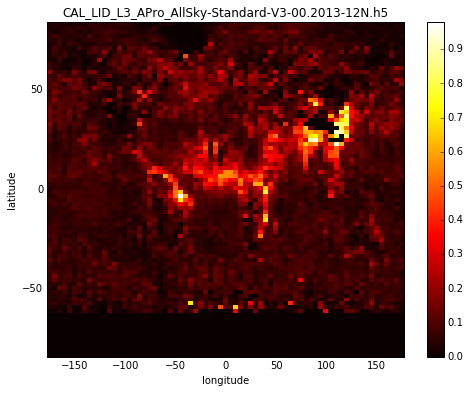

In [25]:
plt.figure(figsize=(8,6))
X,Y=np.meshgrid(all_longitude,all_latitude)
im = plt.pcolormesh(X,Y,aod_clean, cmap='hot')
plt.colorbar(im, orientation='vertical')
plt.axis([X.min(), X.max(), Y.min(), Y.max()])
plt.xlabel('longitude')
plt.ylabel('latitude')
title=sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

##### Using basemap

In [26]:
#LSST site
Longitude_lsst = -70.7366833333333 # deg
Latitude_lsst = -30.240741666666672 #deg
Altitude_lsst = 2749.999999999238 #m


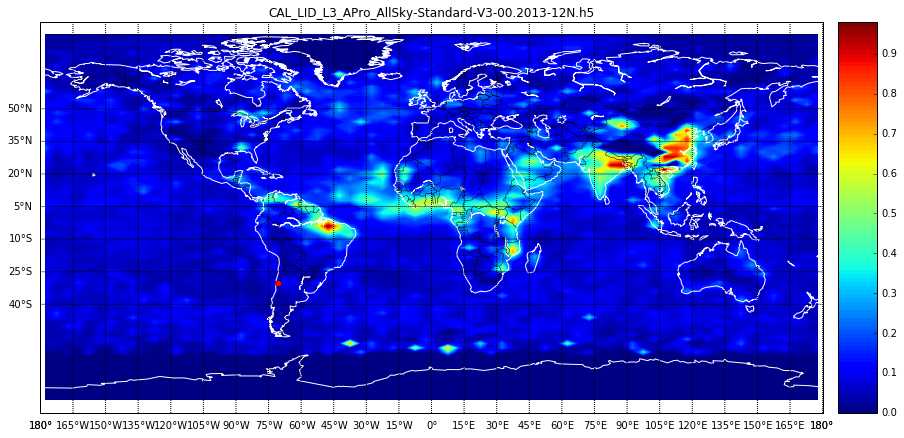

In [27]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines(color="white")
map.drawcountries(color="black")
img=map.contourf(X, Y, aod_clean,100)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(-40,61.,15.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,180.,15.),labels=[True,False,False,True])
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
#plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
title=sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

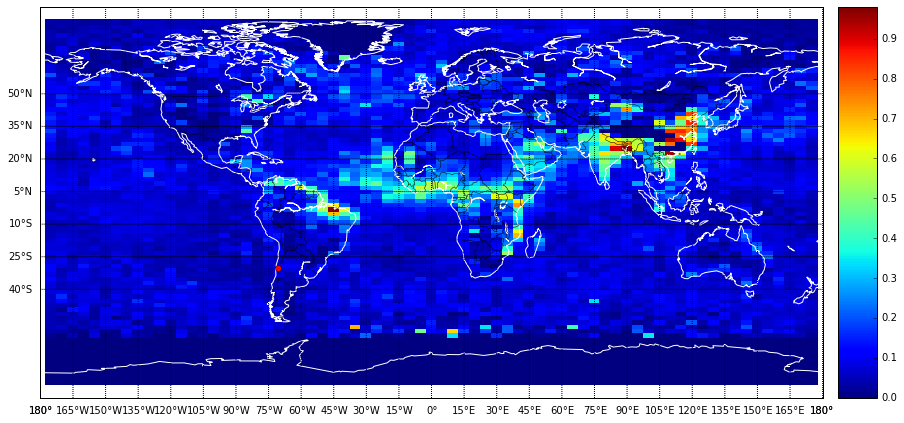

In [28]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines(color="white")
map.drawcountries(color="black")
#img=map.contourf(X, Y, aod_clean,100)
img = plt.pcolormesh(X,Y,aod_clean)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(-40,61.,15.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,180.,15.),labels=[True,False,False,True])
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
#plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
title=sel_filename
plt.savefig(pp, format='pdf')
plt.show()

#### South America
-----------------

In [29]:
#LSST site
Longitude_lsst = -70.7366833333333 # deg
Latitude_lsst = -30.240741666666672 #deg
Altitude_lsst = 2749.999999999238 #m

#CTIO Site
Longitude_ctio = -70.815 # deg
Latitude_ctio = -30.165277777777778 #deg
Altitude_ctio = 2214.9999999993697 #m

# Cerro Paranal
Longitude_paranal = -70.40300000000002 #deg
Latitude_paranal  = -24.625199999999996 #deg
Altitude_paranal = 2635.0000000009704 #m

#### define south america 

- longitude -100° to -30°
- latitude -55° to 15°

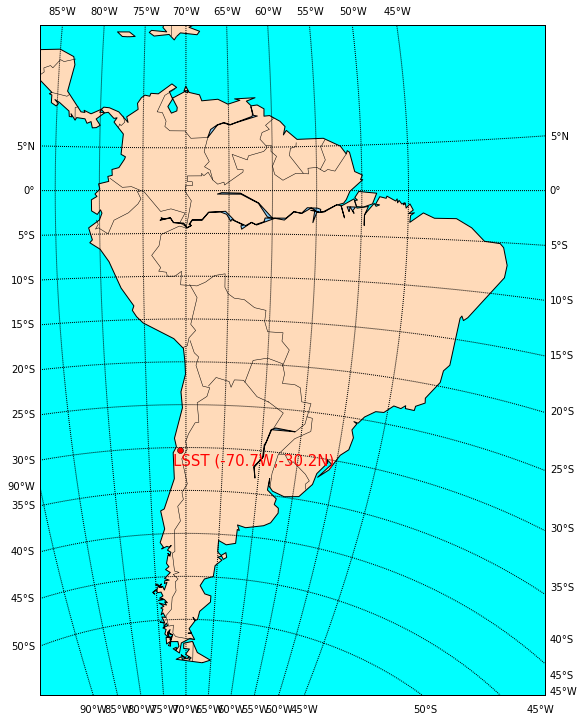

In [30]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
#map = Basemap(llcrnrlon=-100,llcrnrlat=-60,urcrnrlon=-25.,urcrnrlat=15.,resolution='i', projection='tmerc', lat_0 = -30, lon_0 = -70)

map = Basemap(llcrnrlon=-100,llcrnrlat=-55,urcrnrlon=-30.,urcrnrlat=15., projection='tmerc', lat_0 = -30, lon_0 = -70)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='peachpuff',lake_color='lightskyblue')
map.drawcoastlines()
map.drawcountries()
map.drawparallels(np.arange(-50,10,5.),labels=[True,True,True,True])
map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,True,True])

xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
# convert back to lat/lon
#lonpt, latpt = map(xpt_lsst,ypt_lsst,inverse=True)
map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt_lsst-100000,ypt_lsst-200000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='red', fontsize=15)
plt.savefig(pp, format='pdf')
plt.show()

### Region and Data selection for South America

In [31]:
LongMin=-100
LongMax=-30
LatMin=-55
LatMax=15

In [32]:
flags_long=np.logical_and(X>=LongMin, X<=LongMax)   # flags in X where are the selected longitudes
flags_lat=np.logical_and(Y>=LatMin, Y<=LatMax)      # flags in Y where are the selected longitudes
flags_longlat=np.logical_and(flags_long,flags_lat)  # flags where the region is selected in the long-lat matrix
selected_long_indexes=np.where(np.logical_and(all_longitude>=LongMin, all_longitude<=LongMax))
selected_lat_indexes=np.where(np.logical_and(all_latitude>=LatMin, all_latitude<=LatMax))
selected_long=all_longitude[selected_long_indexes] # all selected longitudes
selected_lat=all_latitude[selected_lat_indexes]    # all selected latitudes
min_long_index=np.min(selected_long_indexes)
max_long_index=np.max(selected_long_indexes)
min_lat_index=np.min(selected_lat_indexes)
max_lat_index=np.max(selected_lat_indexes)
#extracted_aod=aod_clean[seletected_lat_indexes,selected_long_indexes]
extracted_aod=aod_clean[min_lat_index:max_lat_index,min_long_index:max_long_index] # extract the aod data

In [33]:
# check what has been done
print('selected_long_indexes=',selected_long_indexes)
print('selected_lat_indexes=',selected_lat_indexes)
print('selected_long=',selected_long)
print('selected_lat=',selected_lat)
print("flags_longlat.shape=",flags_longlat.shape)
print("flags_long.shape=",flags_long.shape)
print("flags_lat.shape=",flags_lat.shape)
print("total number of ll bins",flags_longlat.shape[0]*flags_longlat.shape[1])
print("min_long_index=",min_long_index)
print("max_long_index=",max_long_index)
print("min_lat_index=",min_lat_index)
print("max_lat_index=",max_lat_index)
print("extracted_aod.shape=",extracted_aod.shape)
print("extracted_aod.size=",extracted_aod.shape[0]*extracted_aod.shape[1])
#print("extracted_aod=",extracted_aod)

('selected_long_indexes=', (array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),))
('selected_lat_indexes=', (array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49]),))
('selected_long=', array([-97.5, -92.5, -87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5,
       -52.5, -47.5, -42.5, -37.5, -32.5], dtype=float32))
('selected_lat=', array([-54., -52., -50., -48., -46., -44., -42., -40., -38., -36., -34.,
       -32., -30., -28., -26., -24., -22., -20., -18., -16., -14., -12.,
       -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,
        12.,  14.], dtype=float32))
('flags_longlat.shape=', (85, 72))
('flags_long.shape=', (85, 72))
('flags_lat.shape=', (85, 72))
('total number of ll bins', 6120)
('min_long_index=', 16)
('max_long_index=', 29)
('min_lat_index=', 15)
('max_lat_index=', 49)
('extracted_aod.shape=', (34, 13))
('extracted_aod.size=', 442)


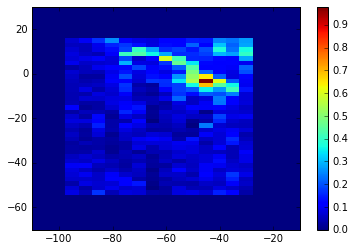

In [34]:
newdata=np.where(flags_longlat,aod_clean  , 0 )  # clean the aod from creazy data
#image = plt.pcolormesh(X,Y,newdata, cmap='hot')
image = plt.pcolormesh(X,Y,newdata)
plt.xlim(-110,-10)
plt.ylim(-70,30)
plt.colorbar(image, orientation='vertical')

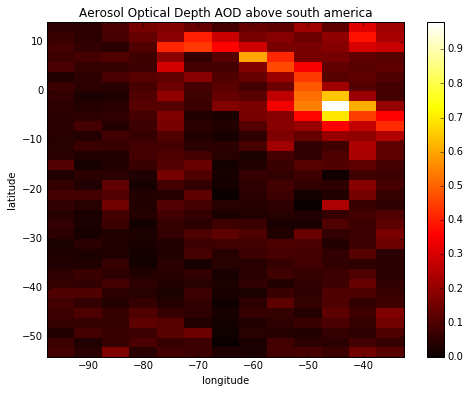

In [35]:
plt.figure(figsize=(8,6))
Xsel,Ysel=np.meshgrid(selected_long,selected_lat)
im = plt.pcolormesh(Xsel,Ysel,extracted_aod, cmap='hot')
plt.colorbar(im, orientation='vertical')
plt.axis([Xsel.min(), Xsel.max(), Ysel.min(), Ysel.max()])
plt.xlabel('longitude')
plt.ylabel('latitude')
title="Aerosol Optical Depth AOD above south america"
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

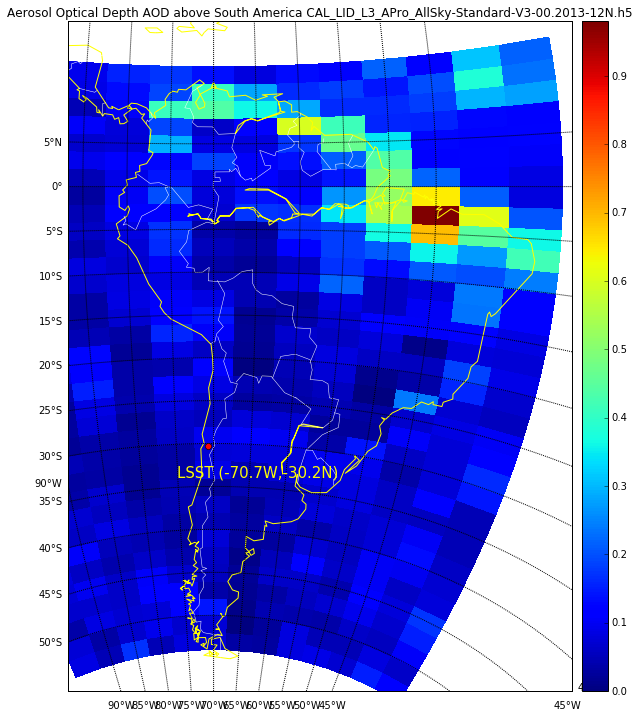

In [36]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
map = Basemap(llcrnrlon=-100,llcrnrlat=-55,urcrnrlon=-30.,urcrnrlat=15., projection='tmerc', lat_0 = -30, lon_0 = -70)
#map.drawmapboundary(fill_color='aqua') # No fill color
#map.fillcontinents(color='peachpuff',lake_color='lightskyblue') # No fill color
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
# convert back to lat/lon
#lonpt, latpt = map(xpt_lsst,ypt_lsst,inverse=True)
map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
#img=map.pcolormesh(Xsel,Ysel,extracted_aod,shading='flat',cmap=plt.cm.jet,latlon=True)
img=map.pcolormesh(Xsel,Ysel,extracted_aod,shading='flat',latlon=True)
#img=map.contourf(Xsel, Ysel, extracted_aod,100)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
map.drawcoastlines(color='yellow')
map.drawcountries(color='white')
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='yellow', fontsize=15)
title="Aerosol Optical Depth AOD above South America " + sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

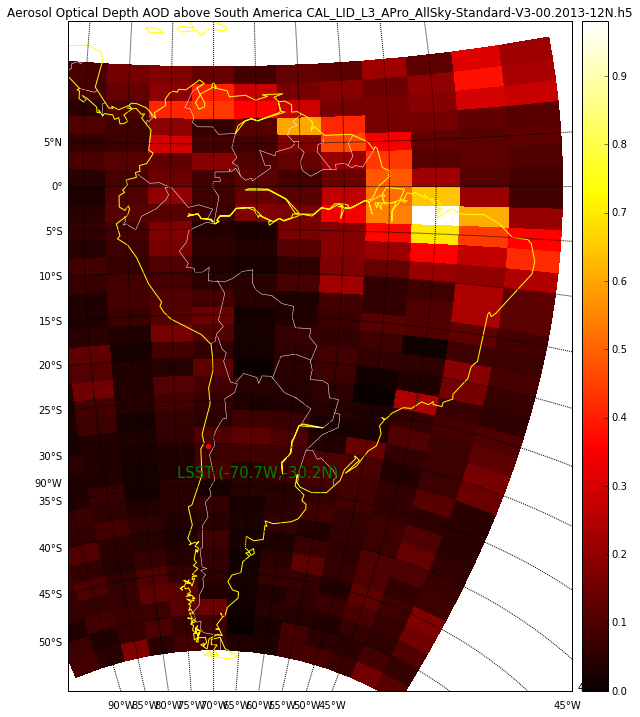

In [37]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(10,12))
map = Basemap(llcrnrlon=-100,llcrnrlat=-55,urcrnrlon=-30.,urcrnrlat=15., projection='tmerc', lat_0 = -30, lon_0 = -70)
#map.drawmapboundary(fill_color='aqua') # No fill color
#map.fillcontinents(color='peachpuff',lake_color='lightskyblue') # No fill color
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
# convert back to lat/lon
#lonpt, latpt = map(xpt_lsst,ypt_lsst,inverse=True)
map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
img=map.pcolormesh(Xsel,Ysel,extracted_aod,shading='flat',cmap="hot",latlon=True)
#img=map.contourf(Xsel, Ysel, extracted_aod,20)
map.colorbar(img,"right", size="5%", pad="2%")
map.drawparallels(np.arange(-50,10,5.),labels=[True,False,False,False])
map.drawmeridians(np.arange(-90.,-40.,5.),labels=[True,True,False,True])
map.drawcoastlines(color='yellow')
map.drawcountries(color='white')
xpt_lsst,ypt_lsst = map(Longitude_lsst,Latitude_lsst)
map.plot(xpt_lsst,ypt_lsst,'ro')  # plot a red dot there
plt.text(xpt_lsst-400000,ypt_lsst-400000,'LSST (%5.1fW,%3.1fN)' % (Longitude_lsst,Latitude_lsst),color='green', fontsize=15)
title="Aerosol Optical Depth AOD above South America "+sel_filename
plt.title(title)
plt.savefig(pp, format='pdf')
plt.show()

#### Find AOD data for LSST site
------------------------------

In [38]:
lsst_long_indexes=np.where(np.logical_and(all_longitude>=Longitude_lsst-2.5, all_longitude<=Longitude_lsst+2.5))
lsst_lat_indexes=np.where(np.logical_and(all_latitude>=Latitude_lsst-1, all_latitude<=Latitude_lsst+1))

In [39]:
print('lsst_long_indexes=',lsst_long_indexes)
print('lsst_lat_indexes=',lsst_lat_indexes)
print('lsst_aod = ',aod_clean[lsst_lat_indexes[0],lsst_long_indexes[0]][0])

('lsst_long_indexes=', (array([21]),))
('lsst_lat_indexes=', (array([27]),))
('lsst_aod = ', 0.097093388)


### Find distance of LSST box

In [40]:
#distance along longitude
x1,y1 = map(Longitude_lsst-2.5,Latitude_lsst)
x2,y2 = map(Longitude_lsst+2.5,Latitude_lsst)
d_long=np.sqrt((x2-x1)**2+(y2-y1)**2)/1000

In [41]:
print x1,x2,y1,y2
print d_long

1574597.67463 2055955.93662 3166386.20516 3169506.40118
481.368374541


In [42]:
#distance along latitude
x1,y1 = map(Longitude_lsst,Latitude_lsst-1)
x2,y2 = map(Longitude_lsst,Latitude_lsst+1)
d_lat=np.sqrt((x2-x1)**2+(y2-y1)**2)/1000

In [43]:
print x1,x2,y1,y2
print d_lat

1816038.99563 1814603.22315 3059723.06431 3281445.29298
221.726877335


### Close file of figures

In [44]:
pp.close()

### Count other things

('np.count_nonzero(flags_longlat)=', 490)
('flags_longlat.shape=', (85, 72))


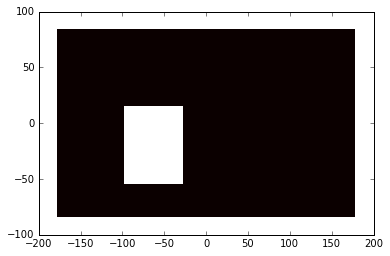

In [45]:
print("np.count_nonzero(flags_longlat)=",np.count_nonzero(flags_longlat))
print("flags_longlat.shape=",flags_longlat.shape)
image = plt.pcolormesh(X,Y,flags_longlat, cmap='hot')

('np.count_nonzero(flags_long)=', 1190)
('flags_long.shape=', (85, 72))


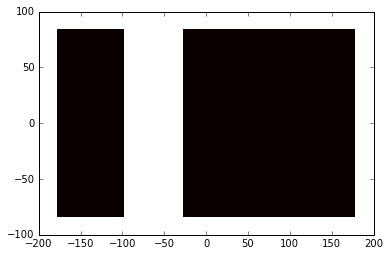

In [46]:
print("np.count_nonzero(flags_long)=",np.count_nonzero(flags_long))
print("flags_long.shape=",flags_long.shape)
image = plt.pcolormesh(X,Y,flags_long, cmap='hot')

('np.count_nonzero(flags_lat)=', 2520)
('flags_lat.shape=', (85, 72))


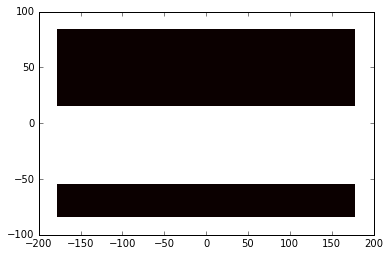

In [47]:
print("np.count_nonzero(flags_lat)=",np.count_nonzero(flags_lat))
print("flags_lat.shape=",flags_lat.shape)
image = plt.pcolormesh(X,Y,flags_lat, cmap='hot')